# WeatherPy

# Analysis
*  Temperature started rising as we moved from negative latitude towards 0 and peaked near 20 then started decreasing again
*  Between -20 to 20 latitude there are very few cities with low humidity
*  Between 40-60 latidude there is high concentration of cities with high humidity
*  Cloudiness seems to work in groups i.e. either 0% or 40%  or 75% or 100% irrespective of the Latitude
*  There is no marked pattern with repect to Latitude vs Windspeed though there is relatively lesser windiness around 0 latitude

#### Import all the dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate the list of random latitudes and longitudes

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Get the city name and country of these random latitudes and longitudes using citipy library

In [3]:
cities = []                     # to store the citipy object
countryCode = []                # store the country code
cityName = []                   # to sotre the city name

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityN = city.city_name
    countryN = city.country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        cityName.append(cityN)
        countryCode.append(countryN)

# Identify the country Code for the cities
#for city in cities:
    #countryCode.append(city.country_code)        
        
# Print the city count to confirm sufficient count
len(cityName)  

756

# Use cityName and countryCode to create the dataframe

In [4]:
city_df = pd.DataFrame(data = cityName, columns = ['CityName'])
city_df['CountryCode'] = countryCode
city_df['CityCountry'] = city_df['CityName'] + ',' + city_df['CountryCode']
city_df.head()

,CityName,CountryCode,CityCountry
0,puerto ayora,ec,"puerto ayora,ec"
1,sioux lookout,ca,"sioux lookout,ca"
2,crotone,it,"crotone,it"
3,patiya,bd,"patiya,bd"
4,provideniya,ru,"provideniya,ru"


# Build the base url string for the API

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="    

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# set up lists to hold reponse info
cityNumber = []
temp = []
humidity = []
wind = []
clouds = []
latitude = []
name = []
country = []
i=1
print('Beginning Data Retrieval')
print('--------------------------')

# Loop through the list of cities (using the dataframe) and perform a request for data on each
for city in city_df['CityCountry']:
    
    print('Processing record ' + str(i) + '.... ' + city)
    print(query_url + city)
    
    i=i+1
    
    response = rq.get(query_url + city).json()
    
    # Handle exceptions if the city is not found in the API
    try:
        cityNumber.append(response['id'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        name.append(response['name'])
        country.append(response['sys']['country'])
        
    except:
        print(city + ': not found....Skipping')


Beginning Data Retrieval
--------------------------
Processing record 1.... puerto ayora,ec
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=puerto ayora,ec
Processing record 2.... sioux lookout,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=sioux lookout,ca
Processing record 3.... crotone,it
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=crotone,it
Processing record 4.... patiya,bd
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=patiya,bd
Processing record 5.... provideniya,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=provideniya,ru
Processing record 6.... wulanhaote,cn
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=wulanhaote,cn
wulanhaote,cn: not f

Processing record 53.... mananara,mg
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=mananara,mg
mananara,mg: not found....Skipping
Processing record 54.... arraial do cabo,br
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=arraial do cabo,br
Processing record 55.... kondinskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=kondinskoye,ru
Processing record 56.... avarua,ck
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=avarua,ck
Processing record 57.... thompson,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=thompson,ca
Processing record 58.... new norfolk,au
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=new norfolk,au
Processing record 59.... camach

tukrah,ly: not found....Skipping
Processing record 106.... katsuura,jp
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=katsuura,jp
Processing record 107.... sobolevo,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=sobolevo,ru
Processing record 108.... pangnirtung,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=pangnirtung,ca
Processing record 109.... tucuman,ar
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=tucuman,ar
tucuman,ar: not found....Skipping
Processing record 110.... phan rang,vn
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=phan rang,vn
phan rang,vn: not found....Skipping
Processing record 111.... poya,nc
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=

Processing record 158.... vaitupu,wf
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=vaitupu,wf
vaitupu,wf: not found....Skipping
Processing record 159.... fevralsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=fevralsk,ru
fevralsk,ru: not found....Skipping
Processing record 160.... vao,nc
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=vao,nc
Processing record 161.... kuminskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=kuminskiy,ru
Processing record 162.... pimentel,pe
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=pimentel,pe
Processing record 163.... matagami,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=matagami,ca
Processing record 164..

Processing record 211.... geraldton,au
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=geraldton,au
Processing record 212.... sambava,mg
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=sambava,mg
Processing record 213.... saldanha,za
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=saldanha,za
Processing record 214.... homnabad,in
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=homnabad,in
Processing record 215.... labelle,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=labelle,ca
Processing record 216.... clyde river,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=clyde river,ca
Processing record 217.... komsomolskiy,ru
http://api.openweathermap.org/data/2

Processing record 264.... bullhead city,us
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=bullhead city,us
Processing record 265.... sisimiut,gl
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=sisimiut,gl
Processing record 266.... khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=khatanga,ru
Processing record 267.... nemuro,jp
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=nemuro,jp
Processing record 268.... bereda,so
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=bereda,so
bereda,so: not found....Skipping
Processing record 269.... vanavara,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=vanavara,ru
Processing record 270.... pontes e lacerda,br
h

Processing record 317.... roma,au
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=roma,au
Processing record 318.... iqaluit,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=iqaluit,ca
Processing record 319.... kiunga,pg
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=kiunga,pg
Processing record 320.... arrifes,pt
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=arrifes,pt
Processing record 321.... ancud,cl
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=ancud,cl
Processing record 322.... fort-shevchenko,kz
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=fort-shevchenko,kz
Processing record 323.... olafsvik,is
http://api.openweathermap.org/data/2.5/weather?appid

Processing record 370.... iracoubo,gf
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=iracoubo,gf
Processing record 371.... college,us
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=college,us
Processing record 372.... hambantota,lk
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=hambantota,lk
Processing record 373.... straumen,no
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=straumen,no
Processing record 374.... na wa,th
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=na wa,th
Processing record 375.... rock sound,bs
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=rock sound,bs
Processing record 376.... felidhoo,mv
http://api.openweathermap.org/data/2.5/weath

Processing record 422.... puerto escondido,mx
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=puerto escondido,mx
Processing record 423.... jacqueville,ci
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=jacqueville,ci
Processing record 424.... svetlyy,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=svetlyy,ru
svetlyy,ru: not found....Skipping
Processing record 425.... castiglione del lago,it
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=castiglione del lago,it
Processing record 426.... tabou,ci
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=tabou,ci
Processing record 427.... zakamensk,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=zakamensk,ru
Processi

Processing record 473.... uvalde,us
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=uvalde,us
Processing record 474.... abha,sa
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=abha,sa
Processing record 475.... dakar,sn
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=dakar,sn
Processing record 476.... lianzhou,cn
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=lianzhou,cn
Processing record 477.... bababe,mr
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=bababe,mr
bababe,mr: not found....Skipping
Processing record 478.... utete,tz
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=utete,tz
Processing record 479.... general pico,ar
http://api.openweathermap.org/data/

Processing record 525.... ushumun,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=ushumun,ru
Processing record 526.... nautla,mx
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=nautla,mx
Processing record 527.... rorvik,no
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=rorvik,no
Processing record 528.... ridgecrest,us
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=ridgecrest,us
Processing record 529.... turukhansk,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=turukhansk,ru
Processing record 530.... batagay,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=batagay,ru
Processing record 531.... havelock,us
http://api.openweathermap.org/data/2.5/weather?a

Processing record 578.... a coruna,es
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=a coruna,es
Processing record 579.... ayna,pe
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=ayna,pe
Processing record 580.... plettenberg bay,za
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=plettenberg bay,za
Processing record 581.... pipri,in
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=pipri,in
Processing record 582.... chapais,ca
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=chapais,ca
Processing record 583.... sangmelima,cm
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=sangmelima,cm
Processing record 584.... algiers,dz
http://api.openweathermap.org/data/2.5/weat

Processing record 631.... beira,mz
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=beira,mz
Processing record 632.... novyy urgal,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=novyy urgal,ru
Processing record 633.... othonoi,gr
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=othonoi,gr
othonoi,gr: not found....Skipping
Processing record 634.... dese,et
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=dese,et
Processing record 635.... parana,br
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=parana,br
Processing record 636.... fukue,jp
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=fukue,jp
Processing record 637.... fulitun,cn
http://api.openweathermap.org/d

Processing record 685.... oktyabrskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=oktyabrskoye,ru
Processing record 686.... westport,ie
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=westport,ie
Processing record 687.... aykino,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=aykino,ru
Processing record 688.... ulagan,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=ulagan,ru
Processing record 689.... severo-yeniseyskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=severo-yeniseyskiy,ru
Processing record 690.... mehriz,ir
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=mehriz,ir
Processing record 691.... lahat,id
http://api.openweathermap.org/d

Processing record 739.... skibotn,no
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=skibotn,no
Processing record 740.... srednekolymsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=srednekolymsk,ru
Processing record 741.... navirai,br
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=navirai,br
Processing record 742.... dongsheng,cn
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=dongsheng,cn
Processing record 743.... balikpapan,id
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=balikpapan,id
Processing record 744.... piacabucu,br
http://api.openweathermap.org/data/2.5/weather?appid=1b4ad24191edb55ca4ebee0c7e4937a4&units=Imperial&q=piacabucu,br
Processing record 745.... bundaberg,au
http://api.openweathermap.org

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame(data = name, columns = ['CityName'])
weather_df['City_id'] = cityNumber
weather_df['Country'] = country
weather_df['Latitude'] = latitude
weather_df['Max_Temperature'] = temp
weather_df['Humidity'] = humidity
weather_df['Cloudiness'] = clouds
weather_df['WindSpeed'] = wind


weather_df.to_csv('output_data/WeatherData.csv')
weather_df.head()


,CityName,City_id,Country,Latitude,Max_Temperature,Humidity,Cloudiness,WindSpeed
0,Puerto Ayora,3652764,EC,-0.74,77.00,61,0,19.46
1,Sioux Lookout,6148373,CA,50.10,77.00,47,75,8.05
2,Crotone,2524881,IT,39.09,77.12,50,0,4.23
3,Patiya,1185148,BD,22.30,84.50,79,100,10.29
4,Provideniya,4031574,RU,64.42,46.40,93,75,6.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

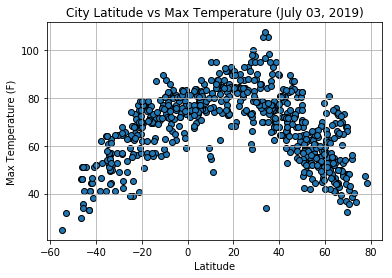

In [8]:
plt.scatter(weather_df['Latitude'],weather_df['Max_Temperature'],edgecolor='black')
plt.title('City Latitude vs Max Temperature' + " (" + datetime.date.today().strftime("%B %d, %Y") + ")")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/Lat_vs_Temp.png')
plt.show()

#### Latitude vs. Humidity Plot

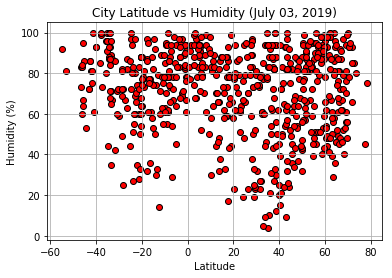

In [16]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black', color = 'red')
plt.title('City Latitude vs Humidity' + " (" + datetime.date.today().strftime("%B %d, %Y") + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(-2,105)
plt.grid()
plt.savefig('output_data/Lat_vs_Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

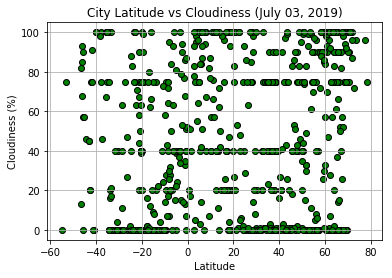

In [10]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black', color = 'green')
plt.title('City Latitude vs Cloudiness' + " (" + datetime.date.today().strftime("%B %d, %Y") + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/Lat_vs_Cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

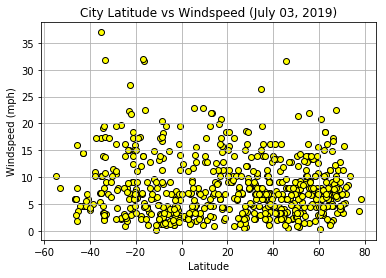

In [11]:
plt.scatter(weather_df['Latitude'],weather_df['WindSpeed'],edgecolors='black',color = 'yellow')
plt.title('City Latitude vs Windspeed' + " (" + datetime.date.today().strftime("%B %d, %Y") + ")")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid()
plt.savefig('output_data/Lat_vs_Wind.png')
plt.show()